In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv('copper-new.txt', header = None, sep = "\s+")

In [3]:
display(data.head())
data.info()

,0,1
0,0.591,24.41
1,4.703,54.98
2,9.470,89.57
3,11.615,114.26
4,12.970,133.61


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       59 non-null     float64
 1   1       59 non-null     float64
dtypes: float64(2)
memory usage: 1.0 KB


In [4]:
X = data.iloc[:,1].values.reshape(-1,1)
Y = data.iloc[:,0].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle = True, random_state=42)

## Part 1

In [5]:
# Using the entire dataset to fit the model
LR = LinearRegression()

LR.fit(X, Y)

y_pred = LR.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(LR.coef_)
print(LR.intercept_)

12.60521776728249
[[0.02128314]]
[7.38412739]


In [6]:
# Using the training data to fit the model
LR = LinearRegression()

LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_pred = LR.predict(X_test)

mean_squared_error(y_test, y_pred)

12.986921759444277

In [8]:
LR.coef_

array([[0.02169922]])

In [9]:
LR.intercept_

array([7.44064023])

## Part 2

In [10]:
MSE_list = []
alpha_list = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]

for n in range(1, 11):
    for m in alpha_list:
        poly = PolynomialFeatures(n)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.fit_transform(X_test)
        clf = Ridge(alpha=m, normalize=True, random_state=42)
        clf.fit(X_train_poly, y_train)
        y_pred = clf.predict(X_test_poly)
        MSE_list.append(mean_squared_error(y_test, y_pred))

In [11]:
MSE_data = np.array(MSE_list).reshape(-1,8)

In [12]:
column_list = ["alpha = "+str(i) for i in alpha_list]
index_list = ["n = "+str(i) for i in range(1,11)]
df = pd.DataFrame(MSE_data, columns = column_list, index = index_list)

In [13]:
df

,alpha = 1e-07,alpha = 1e-06,alpha = 1e-05,alpha = 0.0001,alpha = 0.001,alpha = 0.01,alpha = 0.1,alpha = 1
n = 1,12.986921,12.986917,12.986872,12.986421,12.981946,12.940448,12.797905,18.549388
n = 2,6.053214,6.053165,6.052685,6.047945,6.006842,6.036358,10.669938,17.825714
n = 3,1.432399,1.431693,1.424946,1.386166,2.165050,6.486727,9.500859,18.134711
n = 4,0.209639,0.211184,0.251931,0.936517,2.107008,5.457523,9.622696,18.171859
n = 5,0.067269,0.076455,0.294080,0.613599,2.123238,4.801282,9.858848,18.033499
n = 6,0.071654,0.074917,0.194059,0.646225,1.902647,4.670356,9.913851,17.853795
n = 7,0.065745,0.081531,0.139995,0.661760,1.727718,4.712986,9.842143,17.695252
n = 8,0.067009,0.074750,0.139557,0.605100,1.669262,4.754189,9.735746,17.575090
n = 9,0.072190,0.070965,0.145676,0.538546,1.675436,4.752623,9.644951,17.491131
n = 10,0.075334,0.074542,0.144303,0.497688,1.694644,4.717016,9.584486,17.435402


In [14]:
# MSE_list

In [15]:
poly = PolynomialFeatures(7)
X_train_poly = poly.fit_transform(X_train)
clf = Ridge(alpha=0.0000001, normalize=True, random_state=42)
clf.fit(X_train_poly, y_train)
print(clf.coef_)
print(clf.intercept_)

[[ 0.00000000e+00  2.26915319e-01 -9.38197233e-04  1.77300773e-06
  -9.86069778e-10 -1.34916889e-12  2.08095957e-15 -7.78443447e-19]]
[-4.84658185]


### Plot the fitted line

In [16]:
poly = PolynomialFeatures(7)
x_plot = np.array([i for i in range(20, 860)]).reshape(-1,1)
x_plot_poly = poly.fit_transform(x_plot)

y_plot = clf.predict(x_plot_poly)

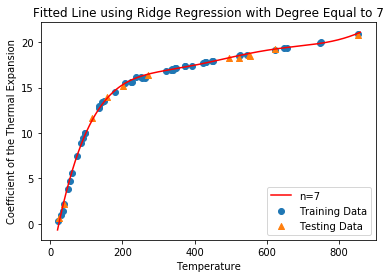

In [17]:
fig, ax = plt.subplots()
lines = ax.scatter(X_train.reshape(-1,), y_train.reshape(-1,), marker = 'o', label = 'Training Data')
lines = ax.scatter(X_test.reshape(-1,), y_test.reshape(-1,), marker = '^', label = 'Testing Data')
lines = ax.plot(x_plot.reshape(-1,), y_plot.reshape(-1,), label = 'n=7', color = 'r')
#lines = ax.plot(max_depth_list, AUC_RF, marker = 'o', label = 'RF')
ax.set(title = "Fitted Line using Ridge Regression with Degree Equal to 7", 
       xlabel = "Temperature", 
       ylabel = "Coefficient of the Thermal Expansion")
ax.legend()
plt.show()

## Part 3

In [18]:
poly = PolynomialFeatures(7)
X_train_poly = poly.fit_transform(X_train)

clf = Ridge(normalize=True, random_state=42)

alpha_list = np.logspace(-9, 1, num=200)
params ={'alpha': alpha_list}

clf_search = GridSearchCV(estimator = clf, param_grid = params, cv = 5, verbose=2, n_jobs = -1)

clf_search.fit(X_train_poly, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=42,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-09, 1.12266777e-09, 1.26038293e-09, 1.41499130e-09,
       1.58856513e-09, 1.78343088e-09, 2.00220037e-09, 2.24780583e-09,
       2.52353917e-09,...
       1.10975250e+00, 1.24588336e+00, 1.39871310e+00, 1.57029012e+00,
       1.76291412e+00, 1.97916687e+00, 2.22194686e+00, 2.49450814e+00,
       2.80050389e+00, 3.14403547e+00, 3.52970730e+00, 3.96268864e+00,
       4.44878283e+00, 4.99450512e+00, 5.60716994e+00, 6.29498899e+00,
       7.06718127e+00, 7.93409667e+00, 8.90735464e+00, 1.00000000e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

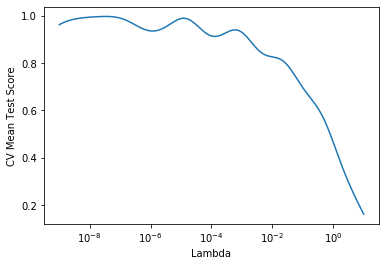

In [19]:
fig, ax = plt.subplots()
lines = ax.plot(alpha_list, clf_search.cv_results_['mean_test_score'])
ax.set( 
       xlabel = "Lambda", 
       ylabel = "CV Mean Test Score")
plt.xscale("log")
plt.show()

In [20]:
clf_search.best_params_

{'alpha': 3.217641750250735e-08}

In [21]:
poly = PolynomialFeatures(7)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

clf = Ridge(normalize=True, random_state=42, alpha = 3.217641750250735e-08)
clf.fit(X_train_poly, y_train)

y_pred = clf.predict(X_test_poly)

print(mean_squared_error(y_test, y_pred))

0.06554169673079102


## Part 4

In [22]:
X_test_400K = np.array([400]).reshape(-1,1)

LR = LinearRegression()
LR.fit(X, Y)

y_pred_LR = LR.predict(X_test_400K)
y_pred_LR

array([[15.89738509]])

In [23]:
poly = PolynomialFeatures(7)
X_train_poly = poly.fit_transform(X_train)
X_test_400K_poly = poly.fit_transform(X_test_400K)

clf = Ridge(normalize=True, random_state=42, alpha = 3.217641750250735e-08)
clf.fit(X_train_poly, y_train)

y_pred_ridge_optimized = clf.predict(X_test_400K_poly)
y_pred_ridge_optimized

array([[17.4932931]])

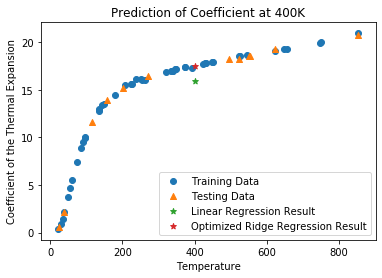

In [24]:
fig, ax = plt.subplots()
lines = ax.scatter(X_train.reshape(-1,), y_train.reshape(-1,), marker = 'o', label = 'Training Data')
lines = ax.scatter(X_test.reshape(-1,), y_test.reshape(-1,), marker = '^', label = 'Testing Data')
lines = ax.scatter(X_test_400K.reshape(-1,), y_pred_LR.reshape(-1,), marker = '*', label = 'Linear Regression Result')
lines = ax.scatter(X_test_400K.reshape(-1,), y_pred_ridge_optimized.reshape(-1,), marker = '*', label = 'Optimized Ridge Regression Result')
ax.set(title = "Prediction of Coefficient at 400K",  
       xlabel = "Temperature", 
       ylabel = "Coefficient of the Thermal Expansion")
ax.legend()
plt.show()